### Project - Bankruptcy Prevention

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
company_data=pd.read_csv('bankruptcy-prevention.csv',sep=';')

In [3]:
company_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
company_data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


### Exploratory Data Analysis

In [5]:
company_data[' class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64

In [6]:
company_data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [7]:
company_data.shape

(250, 7)

In [8]:
company_data.size

1750

In [9]:
company_data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

##### Here in the dataset all the entries are done and null values or missing values.

In [10]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [11]:
company_data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
company_data.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [13]:
company_data.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

In [14]:
# There is a space preceeding in every column names,so removing leading and trailing spaces from column names.
company_data.columns = company_data.columns.str.strip()

In [15]:
company_data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

##### Getting every categories,every columns's value counts

In [16]:
category_columns=company_data.columns.to_list()
print('values counts:\n')

for columns in category_columns:
    print(columns,'\n',company_data[columns].value_counts(),'\n')

values counts:

industrial_risk 
 1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64 

management_risk 
 1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64 

financial_flexibility 
 0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64 

credibility 
 0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64 

competitiveness 
 0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64 

operating_risk 
 1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64 

class 
 non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64 



### Finding the Outliers

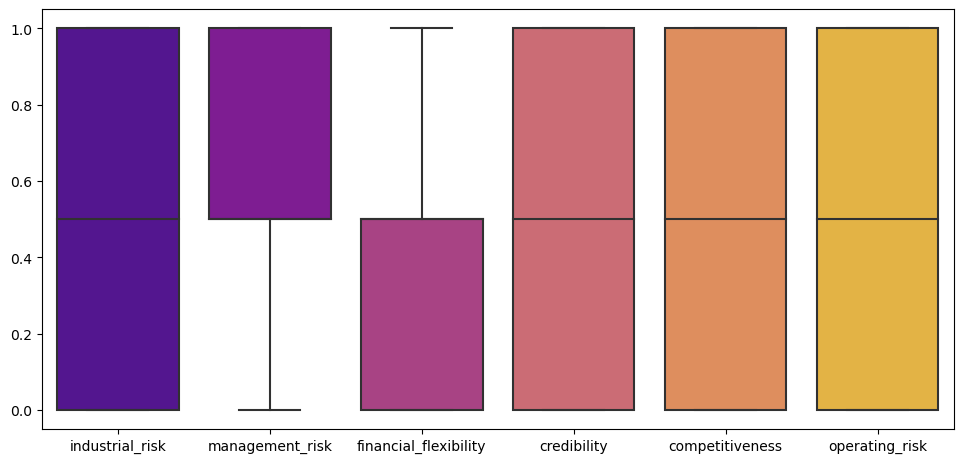

In [17]:
plt.figure(figsize=(40,12))
plt.subplot(2,3,1)
sns.boxplot(company_data,palette='plasma');

* Here in the above plot we didn't find any outliers in the data

### Visualization

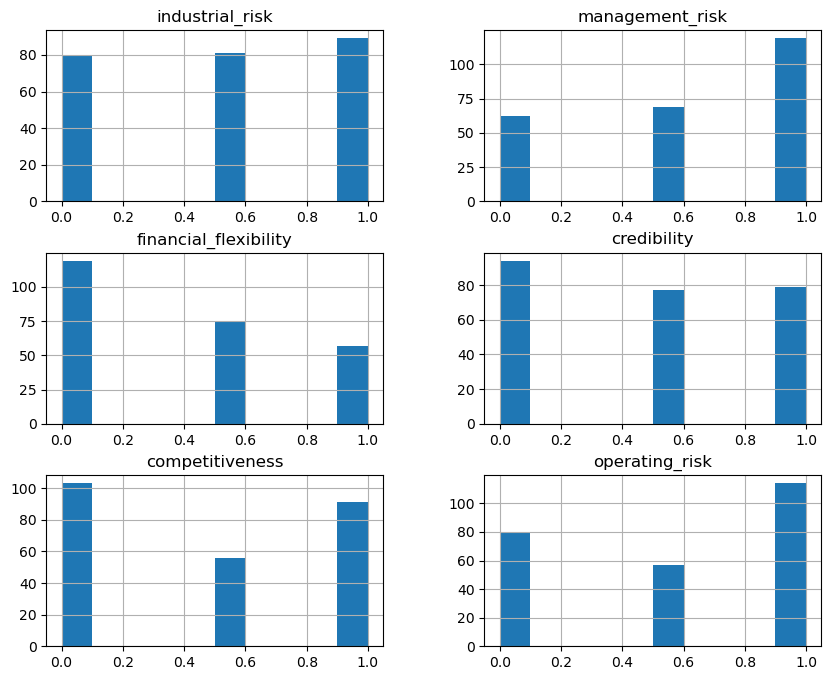

In [18]:
# Histogram
company_data.hist(figsize=(10, 8))
plt.show()

In [19]:
#for columns in category_columns[0:]:
    #sns.countplot(x=columns,data=company_data,palette='rainbow')
    #plt.title(columns)
    #plt.show()

* Most of the industrial risk count is equal to 80 or above 80 high risk count in industrial_risk.


* In the management_risk, there is a high risk count of around 120 compared to low and medium risk which has count between 60-70.


* There is a more count of low risk in finiancial_flexibility.

* In credibility, the count of low risk has around 100 and the counts of low and medium risk are between 70-80.


* In competitiveness, there is almost equal count of low risk and as well as high risk.


* There is high risk count in operating_risk.


* Finally we can see that the bankruptcy has low count compared to non-bankruptcy.


In [20]:
company_data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

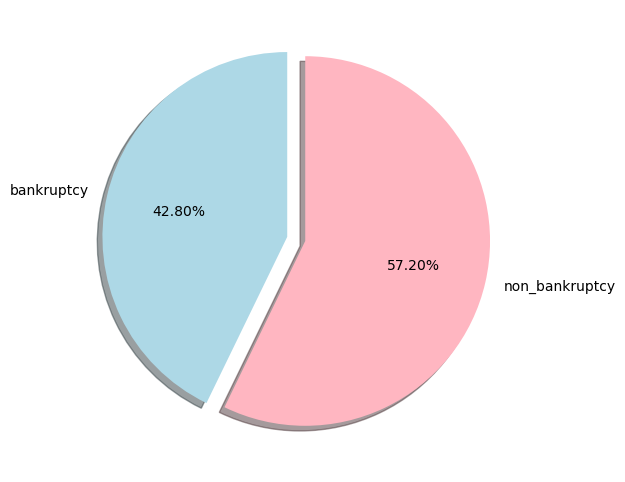

In [21]:
non_bankruptcy = company_data['class'].value_counts()[0]     
bankruptcy = company_data['class'].value_counts()[1]    


plt.subplots(figsize=(8, 6))
label = ['bankruptcy', 'non_bankruptcy']
count = [bankruptcy, non_bankruptcy]
colors = ['lightblue', 'lightpink']
plt.pie(count, labels=label, autopct='%0.2f%%', explode=(0.1,0),colors=colors,shadow=True, startangle=90)
plt.show()

##### *  Here we can see there is 42.80% of bankruptcy and 57.20% of non-bankruptcy.

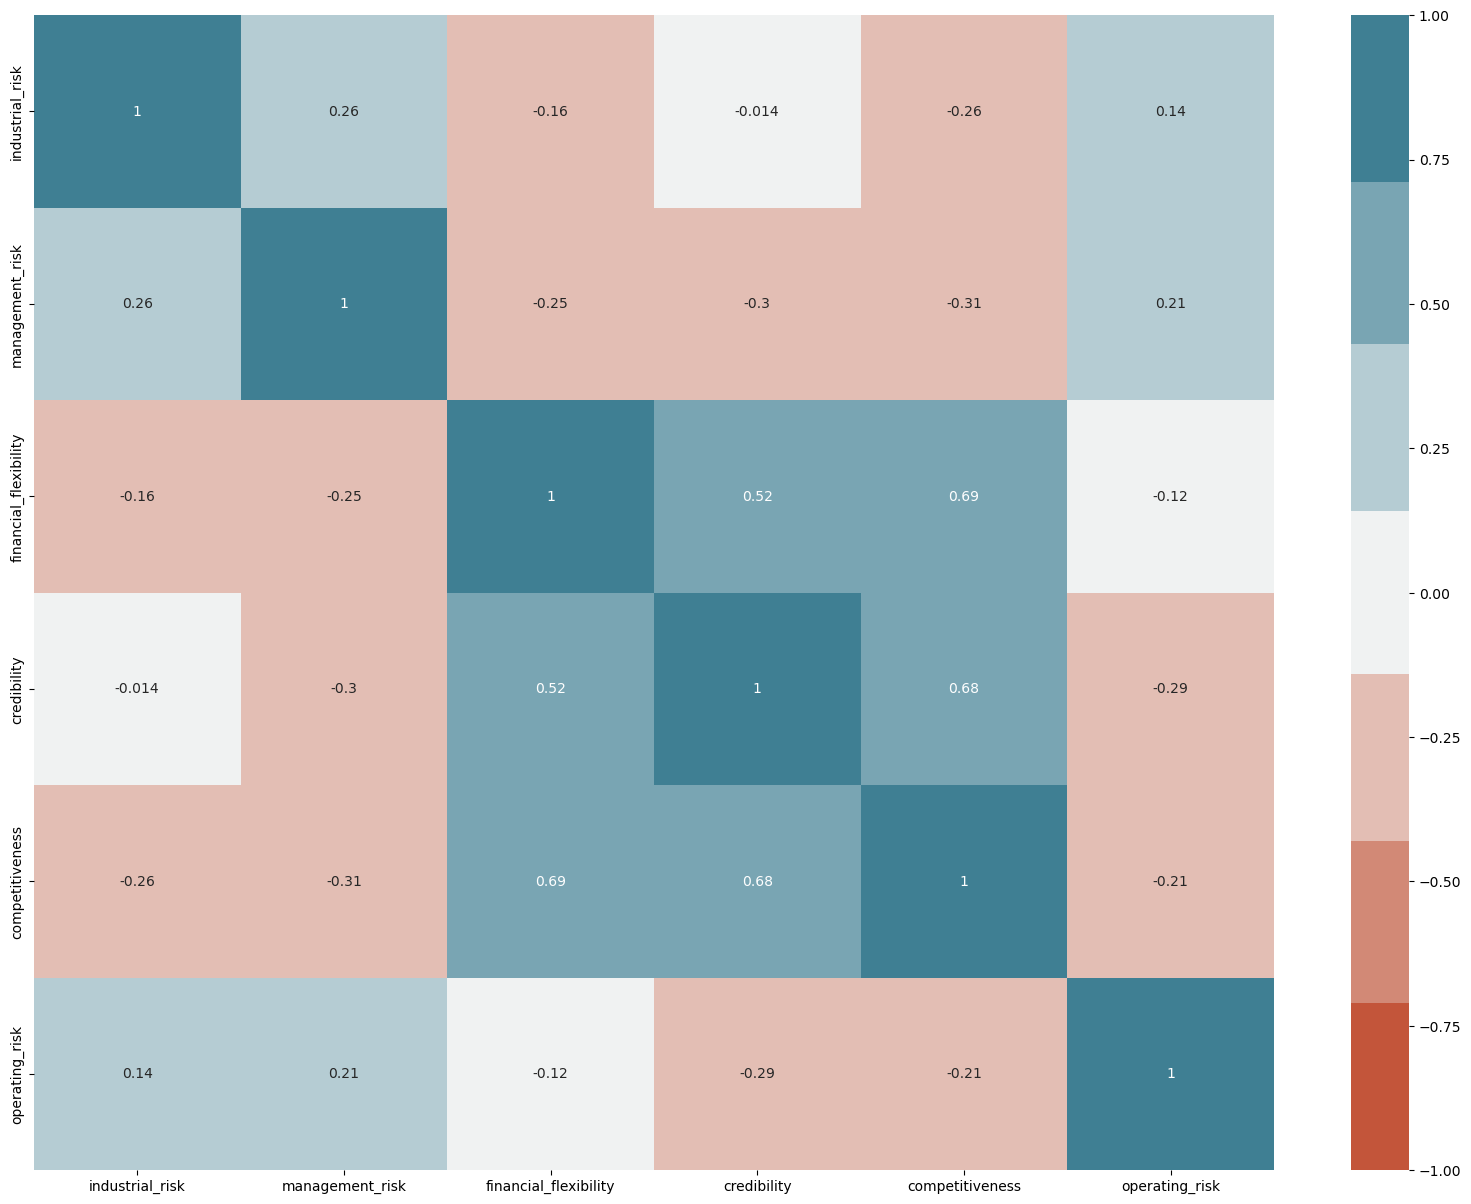

In [22]:
df1=company_data.drop('class',axis=1)
data_corr = df1.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(data_corr, vmin=-1, vmax=1, center=0, annot=True,cmap=sns.diverging_palette(20, 220, n=7))
ax.set_xticklabels(ax.get_xticklabels());

* industrial_risk and management_risk are mostly correlated with each other.

* financial_flexibility is highly correlated with competitiveness and credibility.

* similarly, competitiveness is correlated with financial_flexibility and credibility.

* similar for credibility.

* operating risk is correlated with industrial risk and management risk.

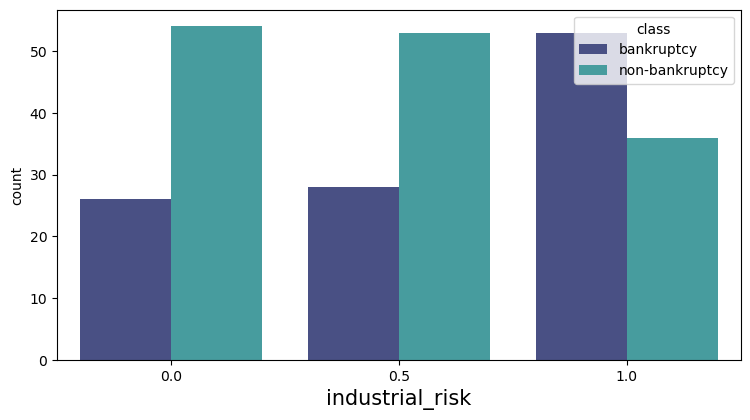

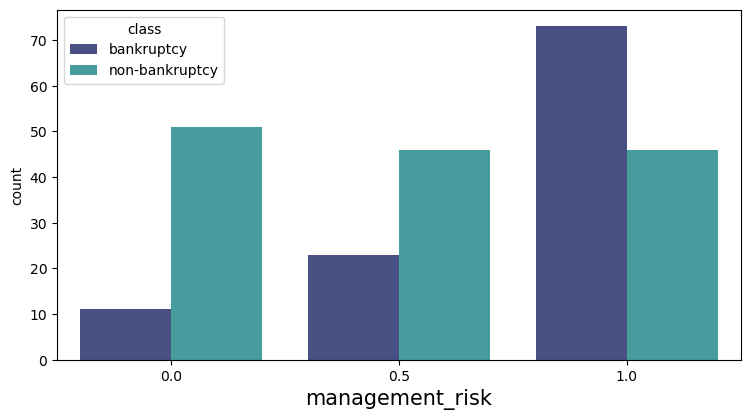

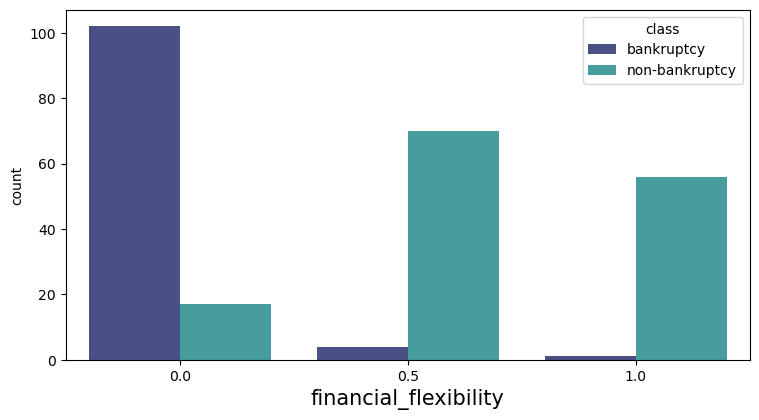

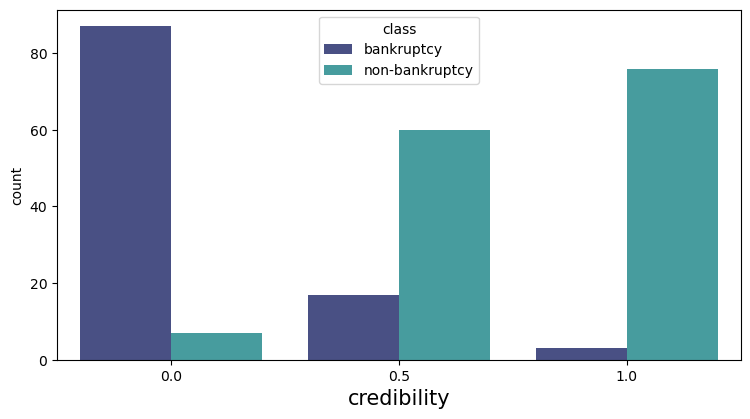

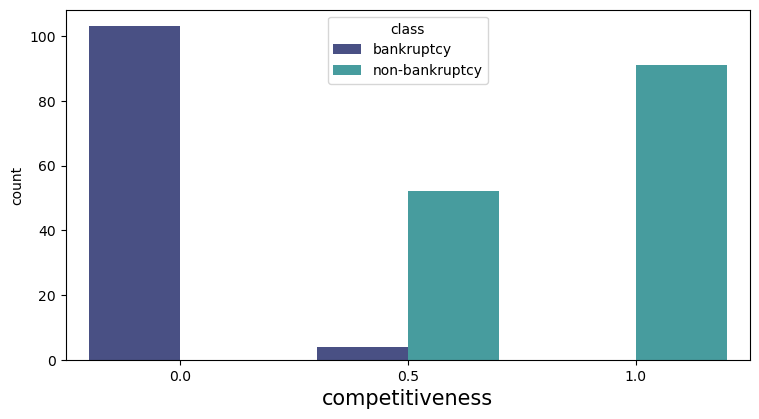

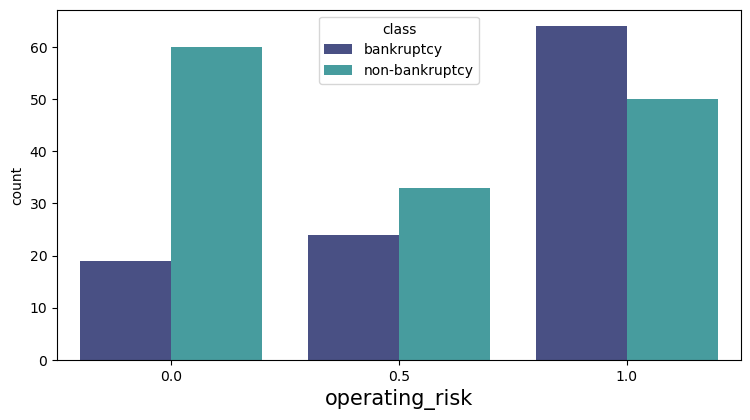

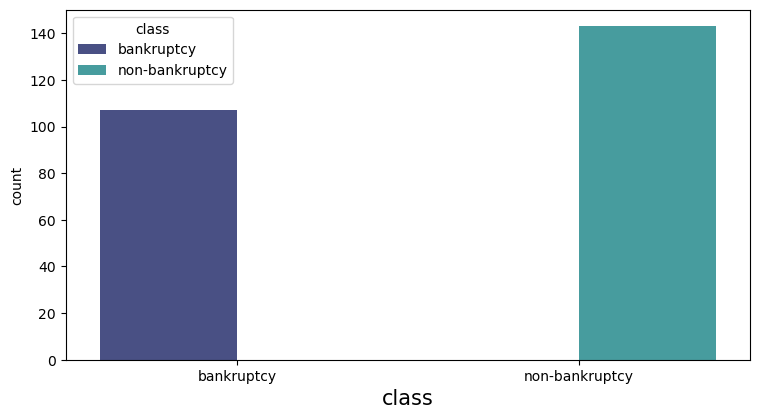

In [23]:
for column_names in category_columns[0:]:
    plt.figure(figsize=(30,10))
    plt.subplot(2,3,1)
    sns.countplot(x=column_names ,hue='class',palette='mako' ,data=company_data )
    plt.xlabel(column_names, fontsize=15)

### Data Cleaning process

#### Encoding Data

In [24]:
Label=LabelEncoder()

In [25]:
company_data['class']=Label.fit_transform(company_data['class'])
company_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


* Here we have converted/encoded the bankruptcy as 0 and non-bankruptcy as 1.

### Model Building

In [26]:
features=company_data.drop(['class'],axis=1)

In [27]:
features

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [28]:
target=company_data['class']
target

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

In [29]:
target.value_counts()

1    143
0    107
Name: class, dtype: int64

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,precision_score,recall_score

#### Splitting the data 

In [31]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(187, 6)
(187,)
(63, 6)
(63, 6)


### Logistic Regression

##### Train and Fit the model

In [33]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train,y_train)

LogisticRegression()

In [34]:
import joblib

# Save the trained model to a file
joblib.dump(Logistic_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [35]:
y_pred_lr=Logistic_model.predict(x_test)
y_pred_lr

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [36]:
# Predicted value count
y_pred_lr=pd.DataFrame(y_pred_lr)
y_pred_lr.value_counts()

1    37
0    26
dtype: int64

In [37]:
# Actual value count.
y_test.value_counts()

1    37
0    26
Name: class, dtype: int64

In [38]:
Logistic_model.coef_

array([[-0.53577332, -0.80110942,  2.31742139,  2.37841945,  3.63324781,
        -0.38668511]])

In [39]:
Logistic_model.intercept_

array([-1.90452907])

##### Model Evaluation

In [40]:
Accuracy_lr=accuracy_score(y_test,y_pred_lr)
Accuracy_lr

1.0

In [41]:
F1_lr=f1_score(y_test,y_pred_lr)
F1_lr

1.0

In [42]:
Precision_lr=precision_score(y_test,y_pred_lr)
Precision_lr

1.0

In [43]:
Recall_lr=recall_score(y_test,y_pred_lr)
Recall_lr

1.0

In [44]:
cm=confusion_matrix(y_test,y_pred_lr)
cm

array([[26,  0],
       [ 0, 37]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



Text(50.722222222222214, 0.5, 'True')

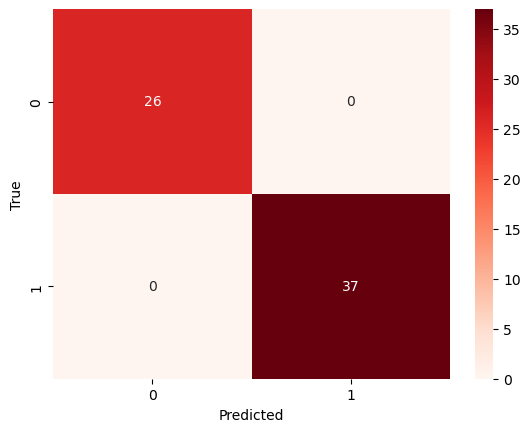

In [46]:
sns.heatmap(cm,annot=True,cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('True')

### KNN

In [47]:
KNN=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')

In [48]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [49]:
y_pred_KNN=KNN.predict(x_test)
y_pred_KNN

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

##### Model Evaluation

In [50]:
Accuracy_KNN=accuracy_score(y_test,y_pred_KNN)
Accuracy_KNN

0.9841269841269841

In [51]:
F1_KNN=f1_score(y_test,y_pred_KNN)
F1_KNN

0.9863013698630138

In [52]:
Precision_KNN=precision_score(y_test,y_pred_KNN)
Precision_KNN

1.0

In [53]:
Recall_KNN=recall_score(y_test,y_pred_KNN)
Recall_KNN

0.972972972972973

In [54]:
a=KNN.score(x_train,y_train)
b=KNN.score(x_test,y_test)
print(a,b)

0.9946524064171123 0.9841269841269841


In [55]:
cm=confusion_matrix(y_test,y_pred_KNN)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



Text(50.722222222222214, 0.5, 'True')

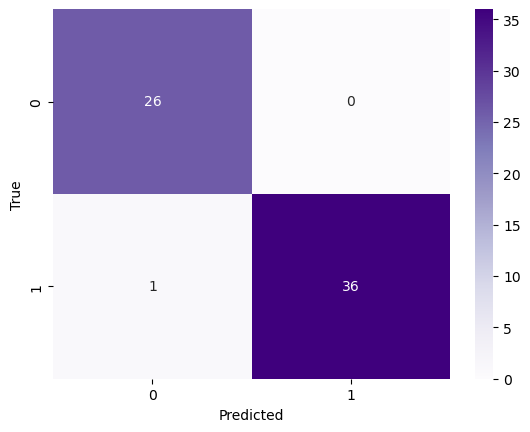

In [57]:
sns.heatmap(cm,annot=True,cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('True')

### Decision Tree

In [58]:
# For 'Gini' Criteria.
DT1 = DecisionTreeClassifier(max_depth=5,criterion = 'gini',splitter='best')

In [59]:
DT1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
y_pred_DT1=DT1.predict(x_test)
y_pred_DT1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

##### Model Evaluation

In [61]:
Accuracy_DT=accuracy_score(y_test,y_pred_DT1)
Accuracy_DT

0.9841269841269841

In [62]:
F1_DT=f1_score(y_test,y_pred_DT1)
F1_DT

0.9863013698630138

In [63]:
Precision_DT=precision_score(y_test,y_pred_DT1)
Precision_DT

1.0

In [64]:
Recall_DT=recall_score(y_test,y_pred_DT1)
Recall_DT

0.972972972972973

In [65]:
cm=confusion_matrix(y_test,y_pred_DT1)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

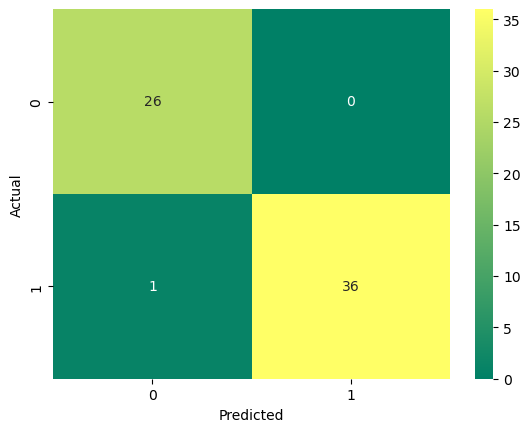

In [66]:
sns.heatmap(cm, annot=True, fmt="d", cmap="summer" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
print(classification_report(y_test,y_pred_DT1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



[Text(0.4, 0.875, 'x[4] <= 0.25\ngini = 0.491\nsamples = 187\nvalue = [81, 106]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(0.6, 0.625, 'x[3] <= 0.25\ngini = 0.054\nsamples = 109\nvalue = [3, 106]'),
 Text(0.4, 0.375, 'x[4] <= 0.75\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 103\nvalue = [0, 103]')]

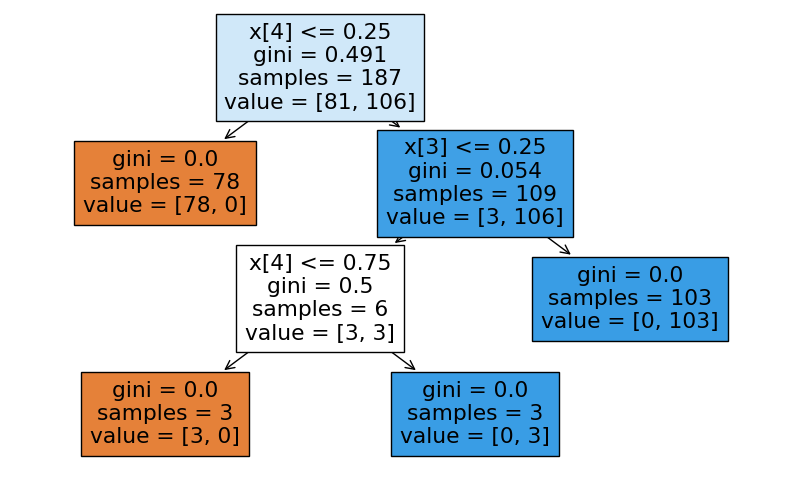

In [68]:
plt.figure(figsize=(10,6))
plot_tree(DT1,filled=True)

In [69]:
# For 'Entropy' Criteria.
DT2 = DecisionTreeClassifier(max_depth=5,criterion = 'entropy')

In [70]:
DT2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [71]:
y_pred2=DT2.predict(x_test)
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

#### Model Evaluation

In [72]:
Accuracy_DT2=accuracy_score(y_test,y_pred2)
Accuracy_DT2

0.9523809523809523

In [73]:
F1_DT2=f1_score(y_test,y_pred2)
F1_DT2

0.9577464788732395

In [74]:
Precision_DT2=precision_score(y_test,y_pred2)
Precision_DT2

1.0

In [75]:
Recall_DT2=recall_score(y_test,y_pred2)
Recall_DT2

0.918918918918919

In [76]:
cm=confusion_matrix(y_test,y_pred2)
cm

array([[26,  0],
       [ 3, 34]], dtype=int64)

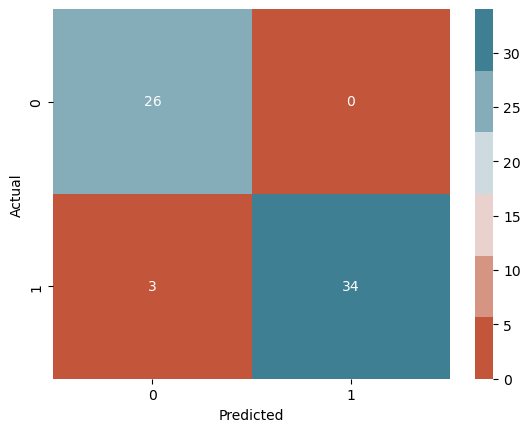

In [77]:
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.diverging_palette(20, 220))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.92      0.96        37

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.96      0.95      0.95        63



[Text(0.4, 0.875, 'x[4] <= 0.25\nentropy = 0.987\nsamples = 187\nvalue = [81, 106]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(0.6, 0.625, 'x[3] <= 0.25\nentropy = 0.182\nsamples = 109\nvalue = [3, 106]'),
 Text(0.4, 0.375, 'x[5] <= 0.75\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 103\nvalue = [0, 103]')]

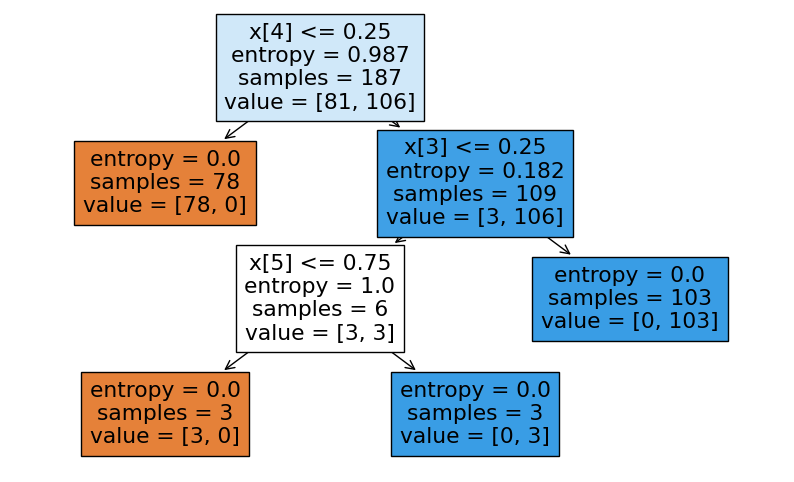

In [79]:
plt.figure(figsize=(10,6))
plot_tree(DT2,filled=True)

### Support Vector Machine 

In [80]:
#for kernel='linear'.
SVM_Linear=SVC(C=1.0,kernel='linear')

In [81]:
SVM_Linear.fit(x_train,y_train)

SVC(kernel='linear')

In [82]:
y_pred_svm_linear=SVM_Linear.predict(x_test)
y_pred_svm_linear

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

#### Model Evaluation

In [83]:
Accuracy_svm_linear=accuracy_score(y_test,y_pred_svm_linear)
Accuracy_svm_linear

1.0

In [84]:
F1_svm_linear=f1_score(y_test,y_pred_svm_linear)
F1_svm_linear

1.0

In [85]:
Precision_svm_linear=precision_score(y_test,y_pred_svm_linear)
Precision_svm_linear

1.0

In [86]:
Recall_svm_linear=recall_score(y_test,y_pred_svm_linear)
Recall_svm_linear

1.0

In [87]:
cm=confusion_matrix(y_test,y_pred_svm_linear)
cm

array([[26,  0],
       [ 0, 37]], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred_svm_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [89]:
#kernel = 'poly'
SVM_poly = SVC(C=1.0,kernel='poly')
SVM_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [90]:
y_pred_svm_poly=SVM_poly.predict(x_test)
y_pred_svm_poly

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

#### Model Evaluation

In [91]:
Accuracy_SVM=accuracy_score(y_test,y_pred_svm_poly)
Accuracy_SVM

0.9841269841269841

In [92]:
F1_SVM=f1_score(y_test,y_pred_svm_poly)
F1_SVM

0.9863013698630138

In [93]:
Precision_SVM=precision_score(y_test,y_pred_svm_poly)
Precision_SVM

1.0

In [94]:
Recall_SVM=recall_score(y_test,y_pred_svm_poly)
Recall_SVM

0.972972972972973

In [95]:
cm=confusion_matrix(y_test,y_pred_svm_poly)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



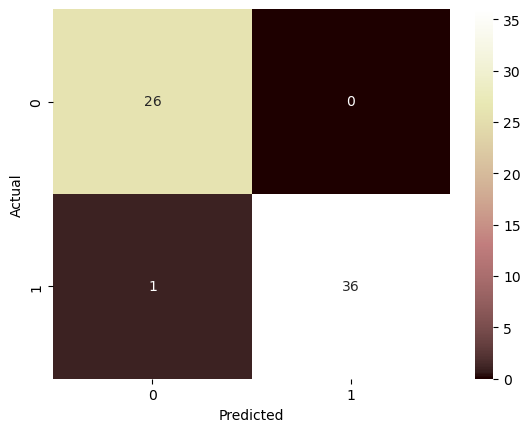

In [97]:
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [98]:
#kernel='rbf'
SVM_rbf = SVC(C=1.0,kernel='rbf')
SVM_rbf.fit(x_train, y_train)

SVC()

In [99]:
y_pred_svm_rbf=SVM_rbf.predict(x_test)
y_pred_svm_rbf

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

#### Model Evaluation

In [100]:
accuracy_score(y_test,y_pred_svm_rbf)

1.0

In [101]:
cm=confusion_matrix(y_test,y_pred_svm_rbf)
cm

array([[26,  0],
       [ 0, 37]], dtype=int64)

In [102]:
print(classification_report(y_test,y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [103]:
#kernel = 'sigmoid'

SVM_sigm = SVC(C=1.0,kernel='sigmoid')
SVM_sigm.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [104]:
y_pred_svm_sigm=SVM_sigm.predict(x_test)
y_pred_svm_sigm

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

##### Model Evaluation

In [105]:
accuracy_score(y_test,y_pred_svm_sigm)

0.8095238095238095

In [106]:
cm=confusion_matrix(y_test,y_pred_svm_sigm)
cm

array([[24,  2],
       [10, 27]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred_svm_sigm))


              precision    recall  f1-score   support

           0       0.71      0.92      0.80        26
           1       0.93      0.73      0.82        37

    accuracy                           0.81        63
   macro avg       0.82      0.83      0.81        63
weighted avg       0.84      0.81      0.81        63



### Random Forest

In [108]:
random_forest_model = RandomForestClassifier(random_state=50)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [109]:
y_pred_rf = random_forest_model.predict(x_test)
y_pred_rf

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

##### Model Evaluation

In [110]:
Accuracy_rf=accuracy_score(y_test, y_pred_rf)
Accuracy_rf

0.9841269841269841

In [111]:
Precision_rf=precision_score(y_test,y_pred_rf)
Precision_rf

1.0

In [112]:
F1_rf=f1_score(y_test,y_pred_rf)
F1_rf

0.9863013698630138

In [113]:
Recall_rf=recall_score(y_test,y_pred_rf)
Recall_rf

0.972972972972973

In [114]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

In [115]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



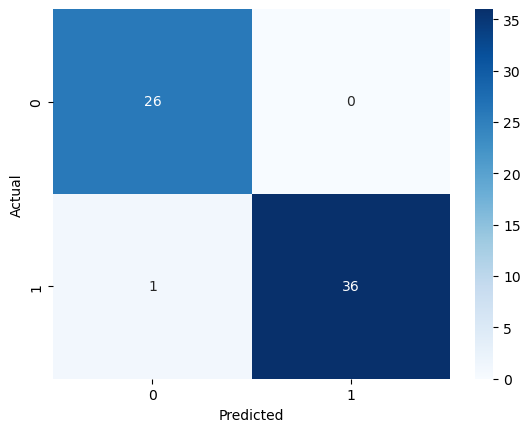

In [116]:
sns.heatmap(cm, annot=True, fmt="d",  cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Naive baye's Model

In [117]:
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(x_train, y_train)

BernoulliNB()

In [118]:
y_pred_nb = naive_bayes_model.predict(x_test)
y_pred_nb

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

##### Model Evaluation

In [119]:
Accuracy_nb = accuracy_score(y_test, y_pred_nb)
Accuracy_nb

0.9841269841269841

In [120]:
Precision_nb=precision_score(y_test,y_pred_nb)
Precision_nb

1.0

In [121]:
F1_nb=f1_score(y_test,y_pred_nb)
F1_nb

0.9863013698630138

In [122]:
Recall_nb=recall_score(y_test,y_pred_nb)
Recall_nb

0.972972972972973

In [123]:
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

In [124]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



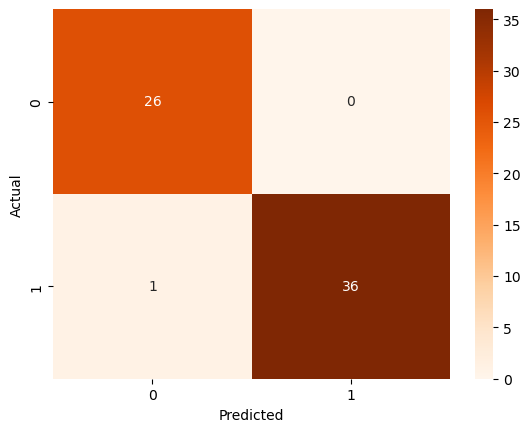

In [125]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [126]:
from xgboost import XGBClassifier

In [127]:
xgboost= XGBClassifier(n_estimators=5)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
y_pred_xgboost = xgboost.predict(x_test)
y_pred_xgboost

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

##### Model Evaluation

In [129]:
Accuracy_xg = accuracy_score(y_test, y_pred_xgboost)
Accuracy_xg

0.9841269841269841

In [130]:
Precision_xg=precision_score(y_test,y_pred_xgboost)
Precision_xg

1.0

In [131]:
F1_xg=f1_score(y_test,y_pred_xgboost)
F1_xg

0.9863013698630138

In [132]:
Recall_xg=recall_score(y_test,y_pred_xgboost)
Recall_xg

0.972972972972973

In [133]:
cm=confusion_matrix(y_test,y_pred_xgboost)
cm

array([[26,  0],
       [ 1, 36]], dtype=int64)

In [134]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



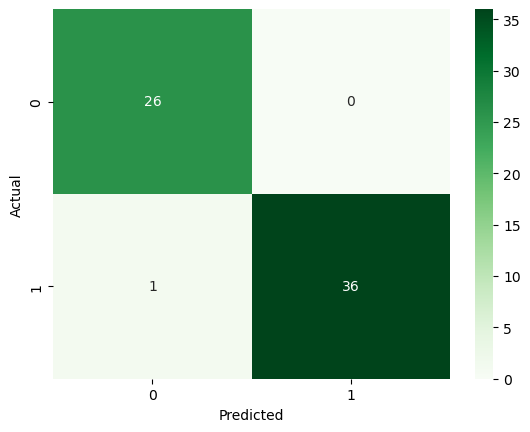

In [135]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [136]:
# Storing Results in a dataframe.
d1={'Models':['Logistic_Regression','KNN','Decision_Tree','SVM','Random_Forest','Naive_Forest','XGBoost'],
    'Accuracy':[Accuracy_lr, Accuracy_KNN, Accuracy_DT, Accuracy_svm_linear, Accuracy_rf, Accuracy_nb, Accuracy_xg],
    'F1_Score':[F1_lr, F1_KNN, F1_DT, F1_SVM, F1_rf, F1_nb, F1_xg],
    'Precision':[Precision_lr, Precision_KNN, Precision_DT, Precision_SVM, Precision_rf, Precision_nb, Precision_xg],
    'Recall':[Recall_lr, Recall_KNN, Recall_DT, Recall_SVM, Recall_rf, Recall_nb, Recall_xg]
     }

In [137]:
Results_df=pd.DataFrame(d1)
Results_df.sort_values(by=['Accuracy'],ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Logistic_Regression,1.000000,1.000000,1.0,1.000000
3,SVM,1.000000,0.986301,1.0,0.972973
1,KNN,0.984127,0.986301,1.0,0.972973
2,Decision_Tree,0.984127,0.986301,1.0,0.972973
4,Random_Forest,0.984127,0.986301,1.0,0.972973
5,Naive_Forest,0.984127,0.986301,1.0,0.972973
6,XGBoost,0.984127,0.986301,1.0,0.972973


Text(0, 0.5, 'Count')

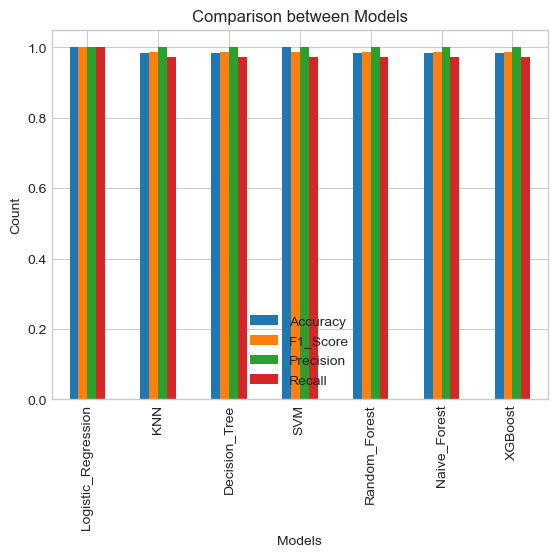

In [138]:
plt.style.use('seaborn-whitegrid')
Results_df.plot(kind='bar',x='Models',y=['Accuracy','F1_Score','Precision','Recall'])
plt.title("Comparison between Models")
plt.ylabel("Count")